## <b> Carga de librerias </b>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import modules
import warnings 
warnings.simplefilter(action='ignore')

import scipy.stats as stats


## <b> Carga de datos </b>

In [2]:
datos = pd.read_csv('train.csv')

In [3]:
datos.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## <b> Balance de datos </b>

In [4]:
datos['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## <b> Exploratoria de Columnas </b>

In [5]:
datos.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
descartados = ['PassengerId', 'Name', 'Ticket', 'Cabin']
seleccion = [x for x in datos.columns if x not in descartados]
datos = datos[seleccion]

In [7]:
categoric_vars, discrete_vars, continues_vars = modules.getColumnsDataTypes(df=datos)
print(len(categoric_vars) + len(discrete_vars) + len(continues_vars))
discrete_vars.remove('Survived')

8


## <b> Analisis de variables categoricas  </b>

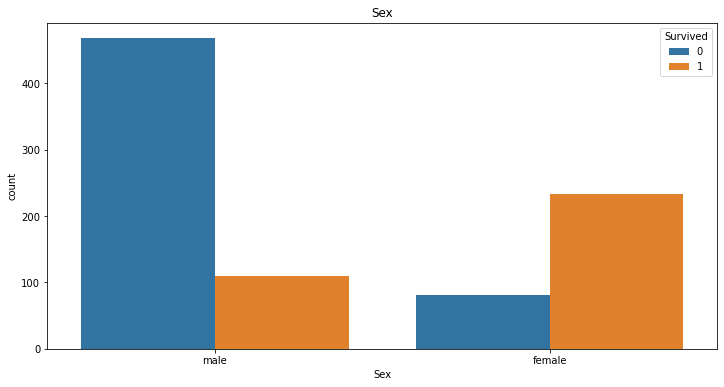

male      577
female    314
Name: Sex, dtype: int64


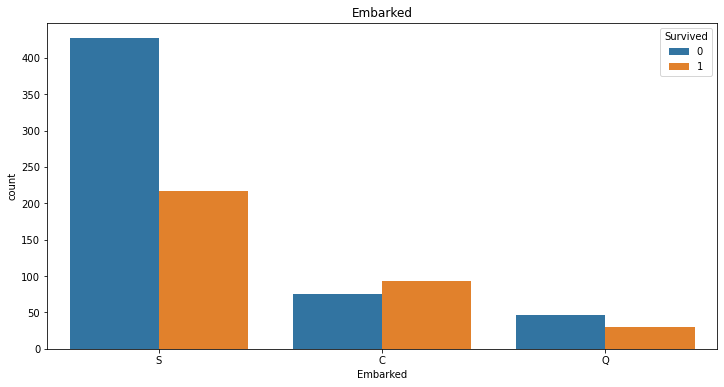

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [8]:
modules.plotCategoricalVals(datos, categoric_vars, y='Survived')

## <b> Analisis de variables Discretas </b>

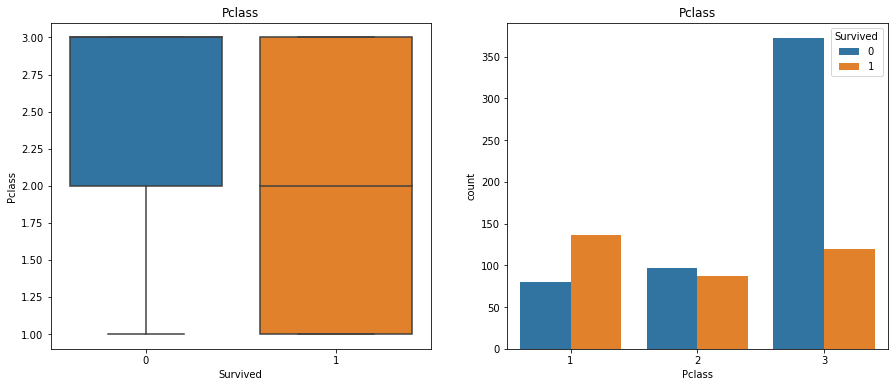

3    491
1    216
2    184
Name: Pclass, dtype: int64


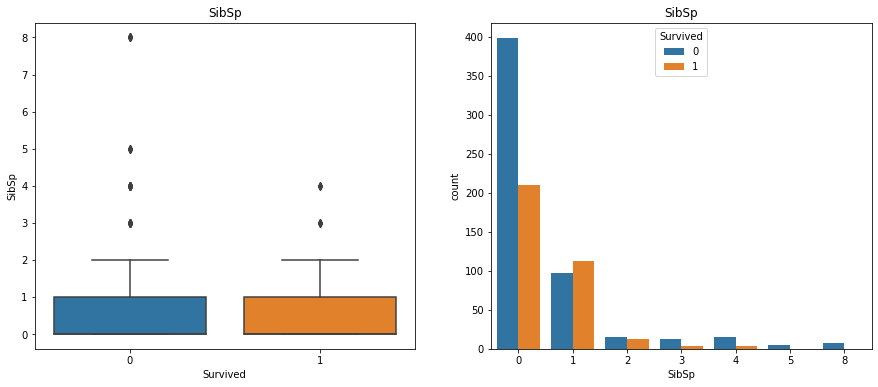

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


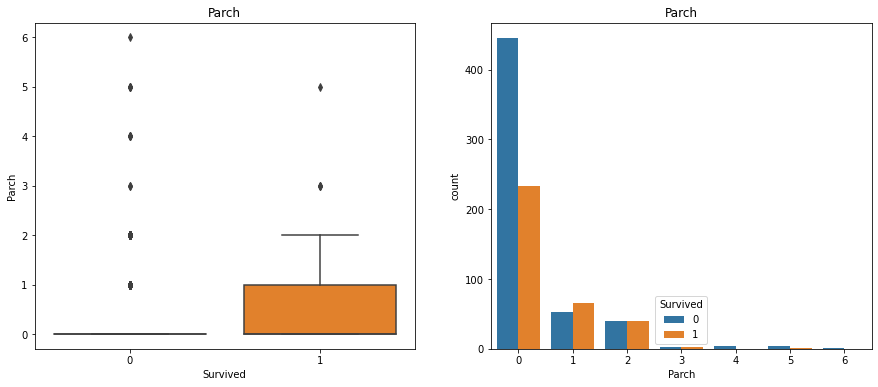

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [9]:
modules.plotDiscreteVals(datos, discrete_vars, y='Survived')

## <b> Analisis de Variables continuas </b>

In [10]:
modules.plotContinueVals(datos, continues_vars, y='Survived')

## <b> Matriz de Correlación </b>

In [11]:
corr_df = datos.corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

## <b> Pruebas de distribución </b>

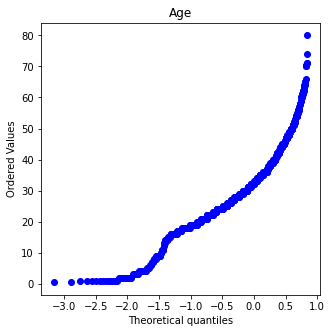

In [12]:
plt.figure(figsize = (5,5))
stats.probplot(datos['Age'], dist="norm", plot=plt)
plt.title('Age')
plt.show()

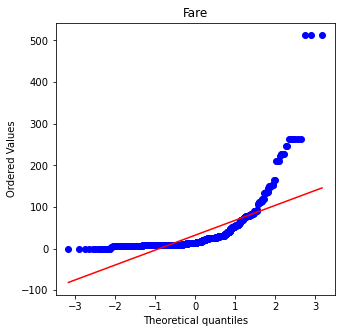

In [13]:
plt.figure(figsize = (5,5))
stats.probplot(datos['Fare'], dist="norm", plot=plt)
plt.title('Fare')
plt.show()

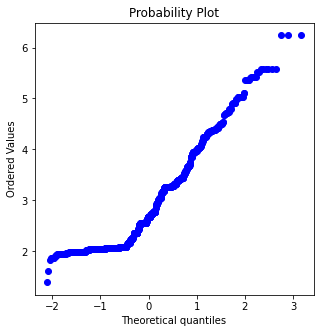

In [14]:
datos['Fare_log'] = np.log(datos['Fare'])
plt.figure(figsize = (5,5))
stats.probplot(datos['Fare_log'], dist="norm", plot=plt)
plt.show()

In [15]:
datos.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Fare_log
0         0       3    male  22.0      1      0   7.2500        S  1.981001
1         1       1  female  38.0      1      0  71.2833        C  4.266662
2         1       3  female  26.0      0      0   7.9250        S  2.070022
3         1       1  female  35.0      1      0  53.1000        S  3.972177
4         0       3    male  35.0      0      0   8.0500        S  2.085672

In [19]:
datos.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
Fare_log    0.000000
dtype: float64

In [20]:
datos.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Fare_log
0         0       3    male  22.0      1      0   7.2500        S  1.981001
1         1       1  female  38.0      1      0  71.2833        C  4.266662
2         1       3  female  26.0      0      0   7.9250        S  2.070022
3         1       1  female  35.0      1      0  53.1000        S  3.972177
4         0       3    male  35.0      0      0   8.0500        S  2.085672